## Problem Statement

- A large company named XYZ, employs, at any given point of time, around 4000 employees. 
However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. 
The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company.
<br/>
- The former employees projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

## Loading Data into Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('general_data.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


**From this describe function we can say that three columns are not required in our dataset as follows:** <br />

- 1. StandardHours: As there is same value in all the rows in column Standard Hours (i.e. 8) so we have to drop it.
- 2. Employee ID: As all the values of this column is unique we have to drop it.
- 3. Employee Count: As the all values of Employee count column is 1 we have to drop it.
- 4. Over18: Over18 column should be dropped as all the employees are over18.

In [5]:
data = data.drop(['StandardHours', 'EmployeeCount', 'EmployeeID', 'Over18'], axis=1)

In [6]:
data.shape

(4410, 20)

## Removing Null Values

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

## Univariate analysis of Categorical Variables

In [10]:
data.kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

**Inferences from above univariate Analysis**

- Age, DistanceFromHome and PercentSalaryHike are Platykurtic as their peakness is negative.
- MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingtimesLastyear, YearsWithCurrManager are Leptokurtic.
- YearsAtCompany and YearsSinceLastPromotion are highly Leptokurtic as there values are higher than 3. 

In [11]:
data.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

**Inferences from above univariate Analysis**

- Age is almost normally distributed as it's skewness lies between -0.5 and 0.5.
- DistanceFromHome, PercentSalaryHike, TrainingTimesLastYear, YearWithCurrManager are moderately positively skewed.
- JobLevel, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are highly positively skewed as there skewness is more than 1.

**Univariate Analysis of Categorical Variables**

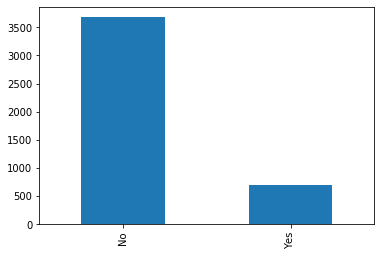

In [12]:
data.Attrition.value_counts().plot.bar()

In [13]:
data.Attrition.value_counts()/len(data.Attrition)

No     0.839115
Yes    0.160885
Name: Attrition, dtype: float64

From above analysis we can conclude that Attrition rate is around is 16%

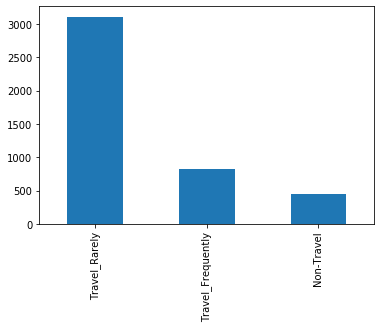

In [14]:
data.BusinessTravel.value_counts().plot.bar()

From above we can conclude that Frequency of Employees who have travel rarely are more

In [15]:
data.Department.value_counts()/len(data.Department)

Research & Development    0.653811
Sales                     0.303514
Human Resources           0.042675
Name: Department, dtype: float64

65% working Employees are from Research and Development Department

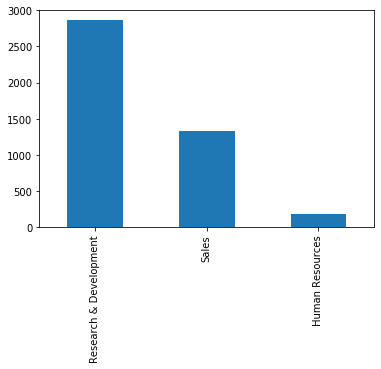

In [16]:
data.Department.value_counts().plot.bar()

In [17]:
data.Education.value_counts()/len(data.Education)

3    0.388179
4    0.271109
2    0.192150
1    0.115929
5    0.032634
Name: Education, dtype: float64

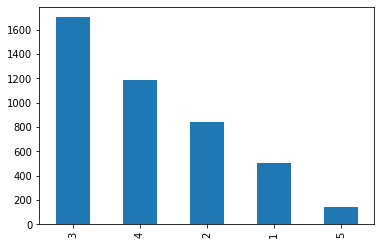

In [18]:
data.Education.value_counts().plot.bar()

From above analysis we can conclude that 38% Employees have Bachelors Degree (3)

In [19]:
data.EducationField.value_counts()/len(data.EducationField)

Life Sciences       0.412141
Medical             0.316066
Marketing           0.108398
Technical Degree    0.089457
Other               0.055682
Human Resources     0.018257
Name: EducationField, dtype: float64

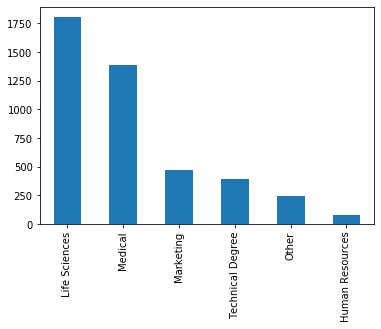

In [20]:
data.EducationField.value_counts().plot.bar()

From above analysis we can conclude that 41% employees are from Life Sciences and around 73% Employees are from Life Sciences and Medical.

In [21]:
data.Gender.value_counts()/len(data.Gender)

Male      0.59927
Female    0.40073
Name: Gender, dtype: float64

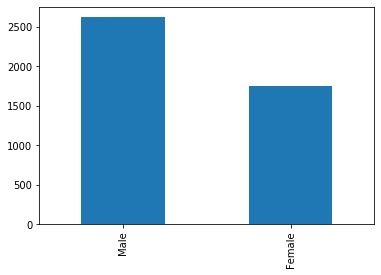

In [22]:
data.Gender.value_counts().plot.bar()

From above analysis we can conclude that there are 59% Employees are Male and other 41% are Females.

In [23]:
data.JobLevel.value_counts()/len(data.JobLevel)

1    0.369466
2    0.362848
3    0.148562
4    0.072570
5    0.046554
Name: JobLevel, dtype: float64

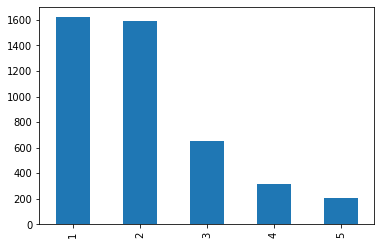

In [24]:
data.JobLevel.value_counts().plot.bar()

From above we can conclude that there are 73% employees with level 1 and level 2 Job.

In [25]:
data.JobRole.value_counts()/len(data.JobRole)

Sales Executive              0.222501
Research Scientist           0.198996
Laboratory Technician        0.176403
Manufacturing Director       0.097901
Healthcare Representative    0.088772
Manager                      0.069603
Sales Representative         0.056139
Research Director            0.054085
Human Resources              0.035600
Name: JobRole, dtype: float64

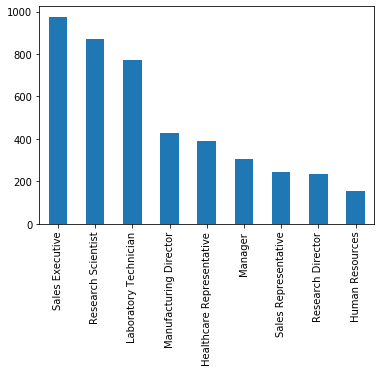

In [26]:
data.JobRole.value_counts().plot.bar()

Most of the employees in the company are working as Sales Executive, Research Scientist and Laboratory Technician.

In [27]:
data.MaritalStatus.value_counts()/len(data.MaritalStatus)

Married     0.45801
Single      0.32063
Divorced    0.22136
Name: MaritalStatus, dtype: float64

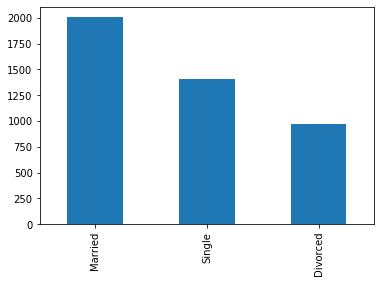

In [28]:
data.MaritalStatus.value_counts().plot.bar()

From above analysis we can conclude that around 45% employees in the company are married  

In [29]:
data.StockOptionLevel.value_counts()/len(data.StockOptionLevel)

0    0.429028
1    0.405294
2    0.107713
3    0.057964
Name: StockOptionLevel, dtype: float64

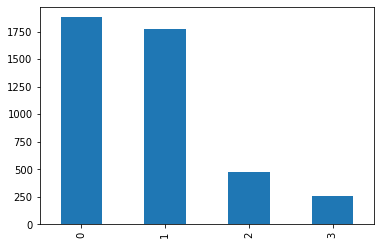

In [30]:
data.StockOptionLevel.value_counts().plot.bar()

From above analysis we can conclude that around 82% Employees have 0 or 1 Stock Option Level.

## Univariate Analysis on Continous Variable

{'whiskers': [<matplotlib.lines.Line2D at 0x22f991ae088>,
 'caps': [<matplotlib.lines.Line2D at 0x22f991bdc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f991bba08>],
 'medians': [<matplotlib.lines.Line2D at 0x22f991c2c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f991c8948>],
 'means': []}

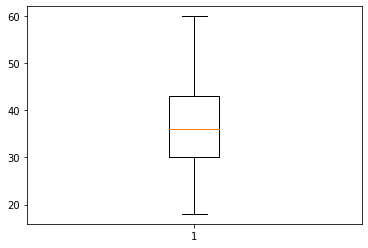

In [31]:
plt.boxplot(data.Age)

There are no outlies and data is almost normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0x22f99223fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f99227f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f992235c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22f9922bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f992316c8>],
 'means': []}

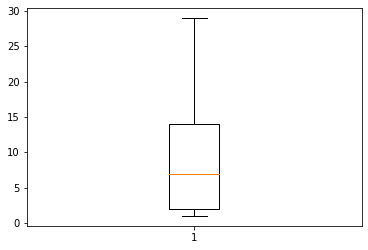

In [32]:
plt.boxplot(data.DistanceFromHome)

DistanceFromHome is Positively Skewed without outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f9928df08>,
 'caps': [<matplotlib.lines.Line2D at 0x22f99291f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f9928d748>],
 'medians': [<matplotlib.lines.Line2D at 0x22f99297fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f9929c7c8>],
 'means': []}

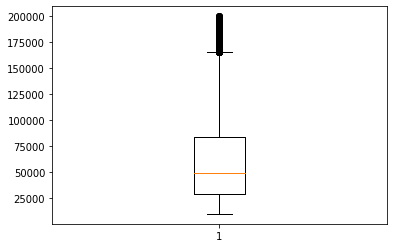

In [33]:
plt.boxplot(data.MonthlyIncome)

MonthlyIncome is also positively Skewed with several Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f992fdc88>,
 'caps': [<matplotlib.lines.Line2D at 0x22f99301c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f992fd308>],
 'medians': [<matplotlib.lines.Line2D at 0x22f99307bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f99307cc8>],
 'means': []}

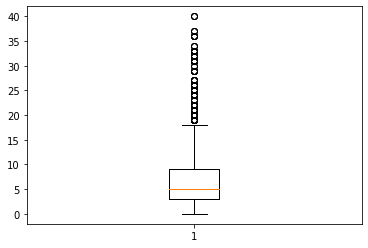

In [34]:
plt.boxplot(data.YearsAtCompany)

YearsAtCompany is positively skewed with several outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f9936dfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f99372f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f9936d5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22f99375a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f9937ba88>],
 'means': []}

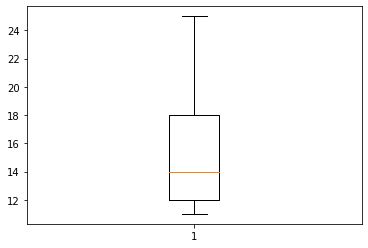

In [35]:
plt.boxplot(data.PercentSalaryHike)

PercentSalaryHike is positively skewed without outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f993d6e88>,
 'caps': [<matplotlib.lines.Line2D at 0x22f993daa08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f993d6588>],
 'medians': [<matplotlib.lines.Line2D at 0x22f993dfb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f993e4b48>],
 'means': []}

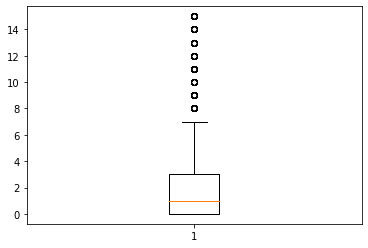

In [36]:
plt.boxplot(data.YearsSinceLastPromotion)

YearsSinceLastPromotion is positively skewed with several outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f99443cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f99448d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f99443288>],
 'medians': [<matplotlib.lines.Line2D at 0x22f9944de48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f9944df48>],
 'means': []}

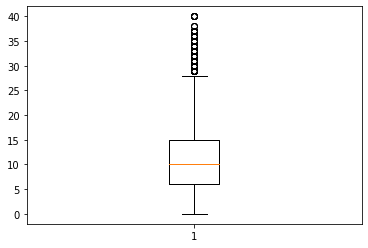

In [37]:
plt.boxplot(data.TotalWorkingYears)

Total Working Years is positively skewed with several outliers

## Applying Chi-Square test

In [38]:
from scipy.stats import chi2_contingency

In [39]:
def chi_square(col):
    
    print(col)
    print("")
    print(f"H0: Attrition is not dependent on {col}")
    print(f"H1: Attrition is dependent on {col}")
    a,b,c,d = chi2_contingency(pd.crosstab(data.Attrition, data[col]))
    print(f"\nP-value is {b}")
    
    if b > 0.05:
        print(f"H0 is accepted because {b} is greater than 0.05 So, Attrition is not dependent on {col}")
    else:
        print(f"H1 is accepted because {b} is less than 0.05 So, Attrition is dependent on {col}")
    
    print("-----------------------")

In [40]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
        'Gender', 'JobLevel', 'JobRole','MaritalStatus', 'StockOptionLevel']
for col in cols:
    chi_square(col)

BusinessTravel

H0: Attrition is not dependent on BusinessTravel
H1: Attrition is dependent on BusinessTravel

P-value is 6.07019702736392e-16
H1 is accepted because 6.07019702736392e-16 is less than 0.05 So, Attrition is dependent on BusinessTravel
-----------------------
Department

H0: Attrition is not dependent on Department
H1: Attrition is dependent on Department

P-value is 2.382970570769315e-06
H1 is accepted because 2.382970570769315e-06 is less than 0.05 So, Attrition is dependent on Department
-----------------------
Education

H0: Attrition is not dependent on Education
H1: Attrition is dependent on Education

P-value is 0.17963050984273224
H0 is accepted because 0.17963050984273224 is greater than 0.05 So, Attrition is not dependent on Education
-----------------------
EducationField

H0: Attrition is not dependent on EducationField
H1: Attrition is dependent on EducationField

P-value is 3.472896220587872e-08
H1 is accepted because 3.472896220587872e-08 is less than 0.05 

## Applying Mannwihtney Test

In [41]:
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})

In [42]:
A_yes = data[data['Attrition']==1]
A_no = data[data['Attrition']==0]

In [43]:
from scipy.stats import mannwhitneyu

In [44]:
def mannwithney(col):
    print(f"H0: There is no significant difference between {col} and Attrition")
    print(f"H1: There is significant difference between {col} and Attrition")

    a, b = mannwhitneyu(A_yes[col],A_no[col])
    print(f"\nP-value is {b}")
    
    if b>0.05:
        print(f"\nH0 is accepted because p-value is greater than 0.05 so," 
              f"\nThere is no significant difference between {col} with respect to Attrition")
    else:
        print(f"\nH1 is accepted because p-value is smaller than 0.05 so," 
              f"\nThere is significant difference between {col} with respect to Attrition")
    print('-----------------------------------------------------------------------------\n')

In [45]:
cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear', 
        'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for cl in cols:
    mannwithney(cl)

H0: There is no significant difference between Age and Attrition
H1: There is significant difference between Age and Attrition

P-value is 7.98668614365882e-30

H1 is accepted because p-value is smaller than 0.05 so,
There is significant difference between Age with respect to Attrition
-----------------------------------------------------------------------------

H0: There is no significant difference between DistanceFromHome and Attrition
H1: There is significant difference between DistanceFromHome and Attrition

P-value is 0.488538986087403

H0 is accepted because p-value is greater than 0.05 so,
There is no significant difference between DistanceFromHome with respect to Attrition
-----------------------------------------------------------------------------

H0: There is no significant difference between MonthlyIncome and Attrition
H1: There is significant difference between MonthlyIncome and Attrition

P-value is 0.06508807631576838

H0 is accepted because p-value is greater than 0.

## Finding Correlation with Attrition

In [46]:
from scipy.stats import pearsonr

In [47]:
def At_corr(col):
    print(f"H0: There is no correlation between {col} and Attrition")
    print(f"H1: There is correlation between {col} and Attrition")
    
    stats, p = pearsonr(data.Attrition, data[col])
    
    print(f"\nP-value is {p} and R is {stats}")
    
    if p > 0.05:
        print("H0 is accepted as pvalue is greater than 0.05\n")
        print(f"There is no correlation between {col} and Attrition")
    else:
        print("H1 is accepted as pvalue is less than 0.05\n")
        if stats > 0:
            print(f"There is positive correlation between {col} and Attrition")
        else:
            print(f"There is negative correlation between {col} and Attrition")
        
    print("----------------------------------------------------------")

In [48]:
cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear', 
        'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']
for cl in cols:
    At_corr(cl)

H0: There is no correlation between Age and Attrition
H1: There is correlation between Age and Attrition

P-value is 5.126598219399243e-26 and R is -0.1583986795409615
H1 is accepted as pvalue is less than 0.05

There is negative correlation between Age and Attrition
----------------------------------------------------------
H0: There is no correlation between DistanceFromHome and Attrition
H1: There is correlation between DistanceFromHome and Attrition

P-value is 0.5317715668019634 and R is -0.009448638515155983
H0 is accepted as pvalue is greater than 0.05

There is no correlation between DistanceFromHome and Attrition
----------------------------------------------------------
H0: There is no correlation between MonthlyIncome and Attrition
H1: There is correlation between MonthlyIncome and Attrition

P-value is 0.04589086274474114 and R is -0.030160293808459582
H1 is accepted as pvalue is less than 0.05

There is negative correlation between MonthlyIncome and Attrition
-------------

## Analysis on Categorical variables with with Positive Attrition

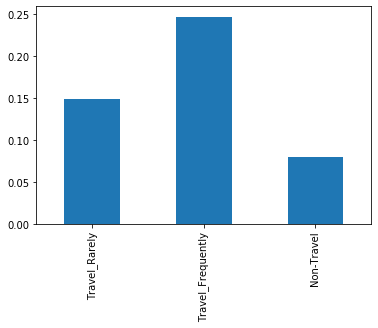

In [49]:
(A_yes.BusinessTravel.value_counts()/data.BusinessTravel.value_counts()).plot.bar()

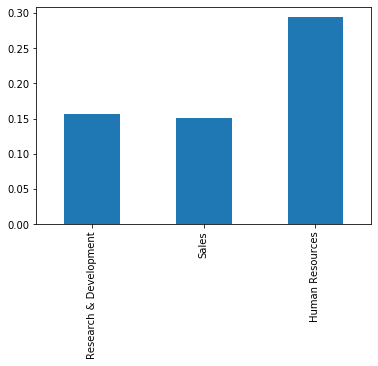

In [50]:
(A_yes.Department.value_counts()/data.Department.value_counts()).plot.bar()

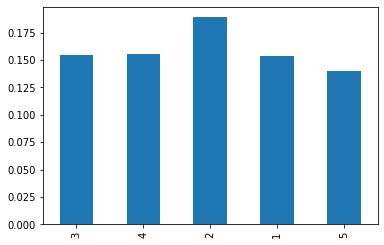

In [51]:
(A_yes.Education.value_counts()/data.Education.value_counts()).plot.bar()

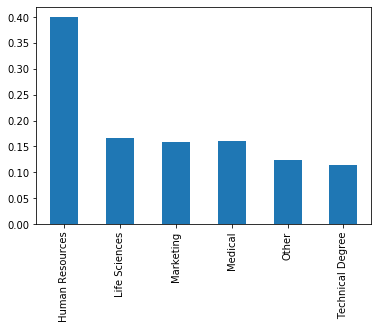

In [52]:
(A_yes.EducationField.value_counts()/data.EducationField.value_counts()).plot.bar()

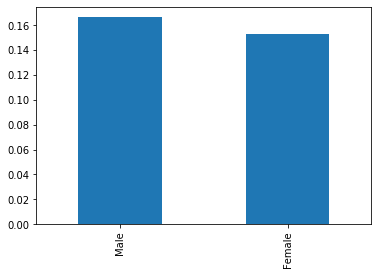

In [53]:
(A_yes.Gender.value_counts()/data.Gender.value_counts()).plot.bar()

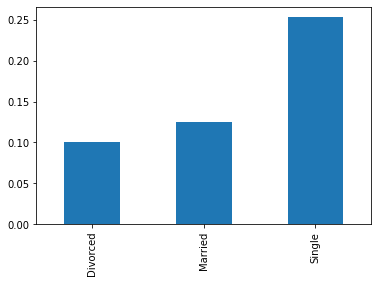

In [54]:
(A_yes.MaritalStatus.value_counts()/data.MaritalStatus.value_counts()).plot.bar()

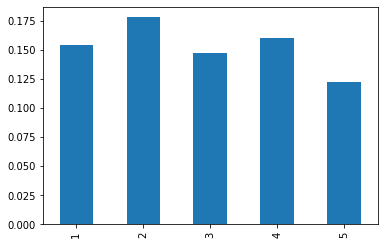

In [55]:
(A_yes.JobLevel.value_counts()/data.JobLevel.value_counts()).plot.bar()

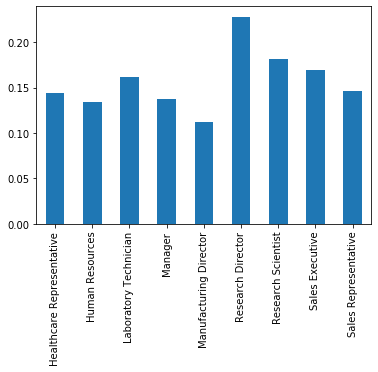

In [56]:
(A_yes.JobRole.value_counts()/data.JobRole.value_counts()).plot.bar()

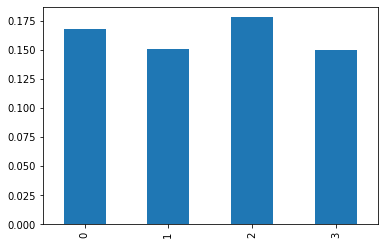

In [57]:
(A_yes.StockOptionLevel.value_counts()/data.StockOptionLevel.value_counts()).plot.bar()

**Inferences from above analysis**

- Employees with High Travel Frequency have high chances of Attrition
- More focus should be laid on HR Department as there Attrition rate is High
- Employees with college education have high Attrition rate.
- Employees who are from HR Background have very high Attrition rate.
- Employees who are single also have very high chances of Attrition rate.
- Employees with Research Director Jobrole have high chances of Attrition rate.

In [58]:
A_yes.median()

Age                           32.0
Attrition                      1.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49080.0
NumCompaniesWorked             1.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears              7.0
TrainingTimesLastYear          3.0
YearsAtCompany                 3.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           2.0
dtype: float64

In [59]:
A_no.median()

Age                           36.0
Attrition                      0.0
DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49300.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

**Inferences from above analysis**

- Employees whose age is around 36 have lower chances of attrition.
- Employees with more years of experience have lower chance of Attrition.

## Conclusion

**1. To reduce the attrition rate more focus should be laid on HR Department**<br/>
**2. Travel Frequency of Employees should be reduced as it increasing the travel frequency increases the attrition rate.**<br/>
**3. Employees with more Education level should be hired more than lower education.**<br/>
**4  People who are married should give higher priority while hiring new employees as they have low chances of attrition.**<br/>
**5. More care should be taken of Research Directors as they have higher chances of Attrition.**<br/>
**6. Employees who have higher experience should be hired as they very low chances of Attrition.**<br/>
**7. More care should be taken of Employees who are single as they have higher chances of Attrition.**<br/>
**8. More care should be taken of Employees who are younger in age.**<br/>
**9. People around 36 years of age should be hire more as they have lower chances of Attrition.**